#### Zadanie 7

Przeprowadź analizę skupień za pomocą algorytmu ahc na zbiorze danych z moduł sklearn.datasets https://scikit-learn.org/stable/datasets.html (np. iris lub breast_cancer)

Popatrzmy ponownie na zbiór danych iris.

**Wczytanie danych**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris_dataset = load_iris()
iris_df = pd.DataFrame(
    data=np.c_[iris_dataset.data, iris_dataset.target],  # np.c_ - numpy concatenate function used here to concatenate iris['data'] and iris['target'] arrays
    columns=iris_dataset.feature_names + ['target']
)
iris_df

# 0 - Iris-setosa
# 1 - Iris-versicolor
# 2 - Iris-virginica

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [2]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
y = iris_df.pop('target')
X = iris_df

In [4]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

In [5]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


**Uczenie modelu**

In [6]:
from scipy.cluster.hierarchy import linkage

# przeprowadzenie grupowania hierarchicznego
z = linkage(X)

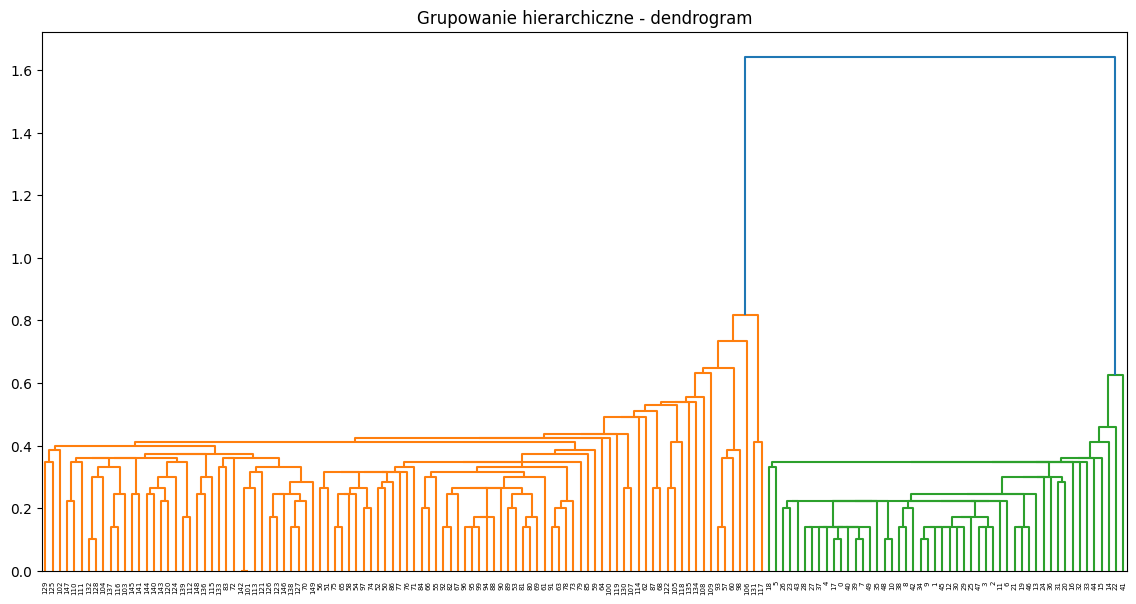

In [7]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(14, 7))
dendrogram(z, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Grupowanie hierarchiczne - dendrogram')
plt.show()

Wyraźnie widzimy tuaj dwa klastry. Ten trzeci jest niestety bardzo mały, zawiera tylko dwie próbki. Przetnijmy dendogram na wyskości ~0,8 tak, żeby otrzymać te trzy klastry.

In [8]:
from scipy.cluster.hierarchy import fcluster

cut_hight = 0.8
y_ahc = fcluster(z, cut_hight, criterion='distance')
print(y_ahc)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


In [9]:
df = pd.DataFrame({'labels': y, 'clusters': y_ahc})
df

,labels,clusters
0,0.0,1
1,0.0,1
2,0.0,1
3,0.0,1
4,0.0,1
...,...,...
145,2.0,3
146,2.0,3
147,2.0,3
148,2.0,3


In [10]:
ct = pd.crosstab(df['labels'], df['clusters'])
ct

clusters,1,2,3
labels,,,
0.0,50,0,0
1.0,0,0,50
2.0,0,2,48


Widać, że algorytm standardowo dla zbiory iris ma trudności z rozdzieleniem gatunków versicolor i virginica. Znacznie większe niż algorytm k-means. 